<a href="https://colab.research.google.com/github/atanasvasilevjourney/Data/blob/master/Credit%20Risk%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Create API Token from Kaggle and Upload json file


In [6]:
import os
import shutil

# Create the Kaggle directory
os.makedirs("/root/.kaggle", exist_ok=True)

# Move kaggle.json into the directory
shutil.move("kaggle.json", "/root/.kaggle/kaggle.json")

# Set permissions to secure the file
os.chmod("/root/.kaggle/kaggle.json", 600)


FileNotFoundError: [Errno 2] No such file or directory: 'kaggle.json'

In [9]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nastadata","key":"9d6ae17893b37f31ce6ae58edf56c181"}'}

In [10]:
import os
import pandas as pd
from kaggle.api.kaggle_api_extended import KaggleApi

Access the dataset and download it from Kaggle through API\\

In [11]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [12]:
!kaggle datasets download -d ranadeep/credit-risk-dataset


Dataset URL: https://www.kaggle.com/datasets/ranadeep/credit-risk-dataset
License(s): GPL-2.0


In [13]:
# Unzip the downloaded dataset
!unzip credit-risk-dataset.zip


Archive:  credit-risk-dataset.zip
  inflating: LCDataDictionary.xlsx   
  inflating: loan/loan.csv           


Read the csv file(dataset) from the unzipped file

In [15]:
df = pd.read_csv('loan/loan.csv')
df.head()

<ipython-input-15-cbd66aa4ce79>:1: DtypeWarning: Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('loan/loan.csv')


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
df.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
887374,36371250,39102635,10000.0,10000.0,10000.0,36 months,11.99,332.10,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,17100.0,NaN,NaN,NaN
887375,36441262,39152692,24000.0,24000.0,24000.0,36 months,11.99,797.03,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,10200.0,NaN,NaN,NaN
887376,36271333,38982739,13000.0,13000.0,13000.0,60 months,15.99,316.07,D,D2,...,NaN,NaN,NaN,NaN,NaN,NaN,18000.0,NaN,NaN,NaN
887377,36490806,39222577,12000.0,12000.0,12000.0,60 months,19.99,317.86,E,E3,...,NaN,NaN,NaN,NaN,NaN,NaN,27000.0,NaN,NaN,NaN
887378,36271262,38982659,20000.0,20000.0,20000.0,36 months,11.99,664.20,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,41700.0,NaN,NaN,NaN


Exploratory Data Analysis Of Credit Risk Dataset

In [17]:
#data type of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           887379 non-null  int64  
 1   member_id                    887379 non-null  int64  
 2   loan_amnt                    887379 non-null  float64
 3   funded_amnt                  887379 non-null  float64
 4   funded_amnt_inv              887379 non-null  float64
 5   term                         887379 non-null  object 
 6   int_rate                     887379 non-null  float64
 7   installment                  887379 non-null  float64
 8   grade                        887379 non-null  object 
 9   sub_grade                    887379 non-null  object 
 10  emp_title                    835917 non-null  object 
 11  emp_length                   842554 non-null  object 
 12  home_ownership               887379 non-null  object 
 13 

In [18]:
#structure of dataset
df.shape

(887379, 74)

In [19]:
#check for missing values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
print(missing_values, missing_percentage)

id                       0
member_id                0
loan_amnt                0
funded_amnt              0
funded_amnt_inv          0
                     ...  
all_util            866007
total_rev_hi_lim     70276
inq_fi              866007
total_cu_tl         866007
inq_last_12m        866007
Length: 74, dtype: int64 id                   0.000000
member_id            0.000000
loan_amnt            0.000000
funded_amnt          0.000000
funded_amnt_inv      0.000000
                      ...    
all_util            97.591559
total_rev_hi_lim     7.919502
inq_fi              97.591559
total_cu_tl         97.591559
inq_last_12m        97.591559
Length: 74, dtype: float64


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Descriptive stats for key features against loan amount


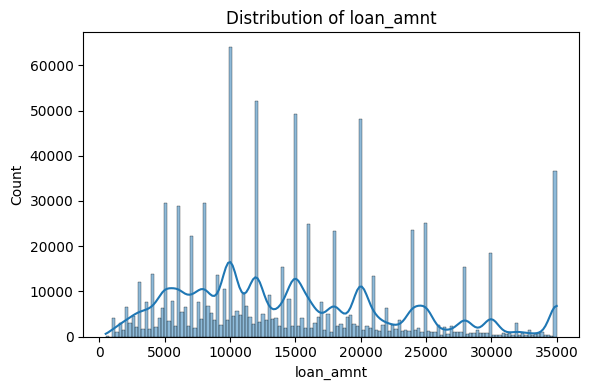

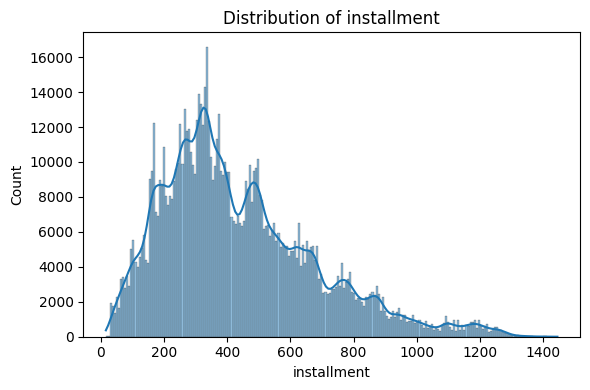

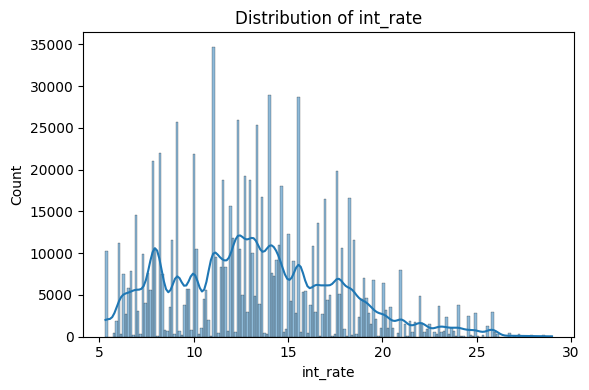

In [21]:

key_numerical = ['loan_amnt', 'installment', 'int_rate']
for col in key_numerical:
    if col in df.columns:
        plt.figure(figsize=(6, 4))
        sns.histplot(df[col].dropna(), kde=True)
        plt.title(f'Distribution of {col}')
        plt.tight_layout()
        plt.show()

Hypothesis Testing  Does term affect interest rates
H0 -  The average interest rates for 36-month and 60-month loans are the same.
H1 - The average interest rates for 36-month and 60-month loans are different.


> Context Checking if applicants with different loan terms (36 months vs 60 months) have significantly different average interest rates.

Choosing the right statistical test in this context?
As we are testing Average interest rates, we are testing central measures, means, so we are using T-test

Preparing the data:

1. As we have a string values in col. Term - 36 months, 60 months, etc. We should extract the numeric values from a string to include in the test.
2. Cluster the groups for different terms of loan

In [22]:
#extract numbers of months from Col.'Term'
df['term_values'] = df['term'].str.extract('(\d+)').astype(float)
print(df['term_values'])

0         36.0
1         60.0
2         36.0
3         36.0
4         60.0
          ... 
887374    36.0
887375    36.0
887376    60.0
887377    60.0
887378    36.0
Name: term_values, Length: 887379, dtype: float64


In [24]:
#collect int rate and cluster them based on term value
group_36 = df[df['term_values'] == 36]['int_rate'].dropna()
group_60 = df[df['term_values'] == 60]['int_rate'].dropna()
print(group_36)
print(group_60)

0         10.65
2         15.96
3         13.49
5          7.90
7         18.64
          ...  
887372    11.99
887373    15.59
887374    11.99
887375    11.99
887378    11.99
Name: int_rate, Length: 621125, dtype: float64
1         15.27
4         12.69
6         15.96
8         21.28
9         12.69
          ...  
887359    15.59
887360     8.67
887368    14.99
887376    15.99
887377    19.99
Name: int_rate, Length: 266254, dtype: float64


Perform T-test



*   A t-test is an inferential statistic used to determine if there is a
statistically significant difference between the means of two variables.

*   The t-test is a test used for hypothesis testing in statistics.


*   Calculating a t-test requires the difference between the mean values from each data set, the standard deviation of each group, and the number of data values

*   T-tests can be dependent or independent.




In [31]:
#performing
import numpy as np
from scipy import stats
t_stat, p_val = stats.ttest_ind(group_36, group_60)

T-statistic: Magnitude indicates how far apart the means are.
P-value
alpha = 0.05

if p-value < 0.05 -> Reject H0 - Loan term affects interest rates
if p-value > 0.05 -> accept H0 -  no effect of loan term

In [26]:
print("T-statistic:", t_stat)
print("P-value:", p_val)
alpha = 0.05
if p_val < alpha:
    print("Reject H₀ → Loan term affects interest rate.")
else:
    print("Fail to reject H₀ → No significant effect.")

T-statistic: -446.17741169251684
P-value: 0.0
Reject H₀ → Loan term affects interest rate.


Conclusions:
T-statistics = -446.18 means significant difference between two categories
p = 0.000
p-value < 0.05 we can reject null hypothesis.Accept the alternative
Long term loans affect the interest rates.
Loan term DOES affect interest rates, with 60-month loans having higher rates than 36-month loans.

Business Context:

Lenders typically charge higher interest rates for longer-term loans (e.g., 60 months) to compensate for increased risk over time.

Statistical Confidence:

The extreme t-statistic and p-value leave no doubt that the difference is real.



### Hypothesis Testing -  Do Different Loan Grades Have Different Interest Rates?

H0 - The mean interest rate is the same across all loan grades
H1 - At least one loan grade has a different mean interest rate.

In [36]:
#prepare data - grade column
grade_rates = df[['grade', 'int_rate']].dropna()
grades_rates_list = df.groupby('grade')['int_rate'].apply(list)
print(grades_rates_list)

grade
A    [7.9, 6.03, 6.03, 7.51, 7.9, 8.9, 7.9, 7.51, 7...
B    [10.65, 12.69, 12.69, 12.69, 9.91, 10.65, 11.7...
C    [15.27, 15.96, 13.49, 15.96, 14.65, 13.49, 15....
D    [16.29, 16.77, 18.25, 16.77, 16.77, 17.27, 16....
E    [18.64, 19.91, 19.91, 19.91, 19.42, 19.91, 20....
F    [21.28, 21.28, 21.67, 22.06, 20.89, 20.89, 21....
G    [23.91, 23.52, 23.13, 22.74, 23.91, 23.91, 23....
Name: int_rate, dtype: object


In [41]:
#ANOVA (Analysis of Variance)
f_statistic, p_value = stats.f_oneway(*grades_rates_list)
print(f"F-statistic: {f_statistic}, p-value: {p_value}")

F-statistic: 1540170.366342256, p-value: 0.0


In [42]:
alpha = 0.05
if p_val < alpha:
    print("Reject H₀ → At least one loan grade has a different mean interest rate.")
else:
    print("Fail to reject H₀ → No significant difference across grades.")

Reject H₀ → At least one loan grade has a different mean interest rate.


From the T-statistist and ANOVA test we can confirm to reject null hypothesis and accept the alternative hypotesis.
We can conclude from this statement, at least one of the loans have different interest rate amongs the different grade loans

Visualization confirmation of our hypothesis testing

we can confirm that the grades of loan are risk based and they have uptrend movements from A to G

Text(0, 0.5, 'Interest Rate (%)')

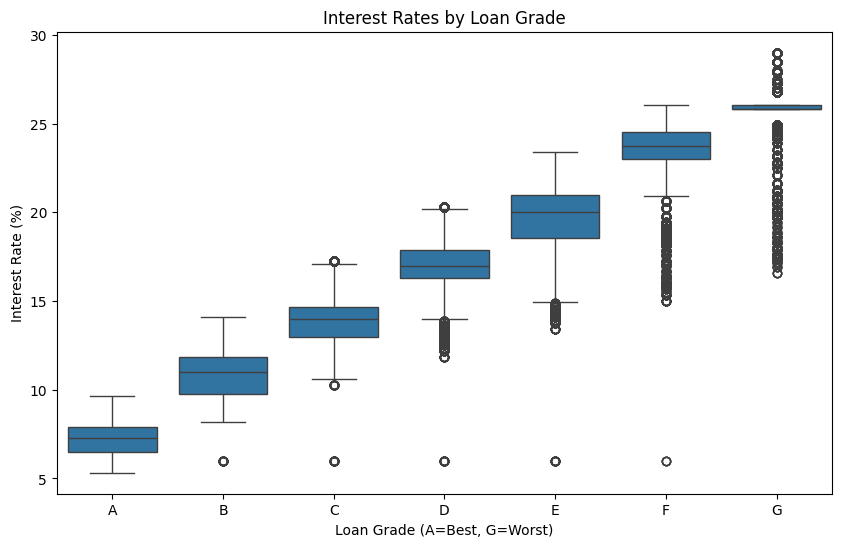

In [43]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=grade_rates, x='grade', y='int_rate', order=sorted(grade_rates['grade'].unique()))
plt.title("Interest Rates by Loan Grade")
plt.xlabel("Loan Grade (A=Best, G=Worst)")
plt.ylabel("Interest Rate (%)")

Risk Correlation Matrix

In [61]:
#select risk feautures(numeric columns)
risk_features = ['loan_amnt', 'int_rate', 'annual_inc', 'funded_amnt', 'installment']
df_risk = df[risk_features].dropna()
print(df_risk.head())

   loan_amnt  int_rate  annual_inc  funded_amnt  installment
0     5000.0     10.65     24000.0       5000.0       162.87
1     2500.0     15.27     30000.0       2500.0        59.83
2     2400.0     15.96     12252.0       2400.0        84.33
3    10000.0     13.49     49200.0      10000.0       339.31
4     3000.0     12.69     80000.0       3000.0        67.79


In [63]:
#matrix in tabular form
correlation_matrix = df_risk.corr()
print(correlation_matrix)

             loan_amnt  int_rate  annual_inc  funded_amnt  installment
loan_amnt     1.000000  0.145018    0.332698     0.999263     0.944977
int_rate      0.145018  1.000000   -0.072786     0.145156     0.133070
annual_inc    0.332698 -0.072786    1.000000     0.332466     0.326182
funded_amnt   0.999263  0.145156    0.332466     1.000000     0.946005
installment   0.944977  0.133070    0.326182     0.946005     1.000000


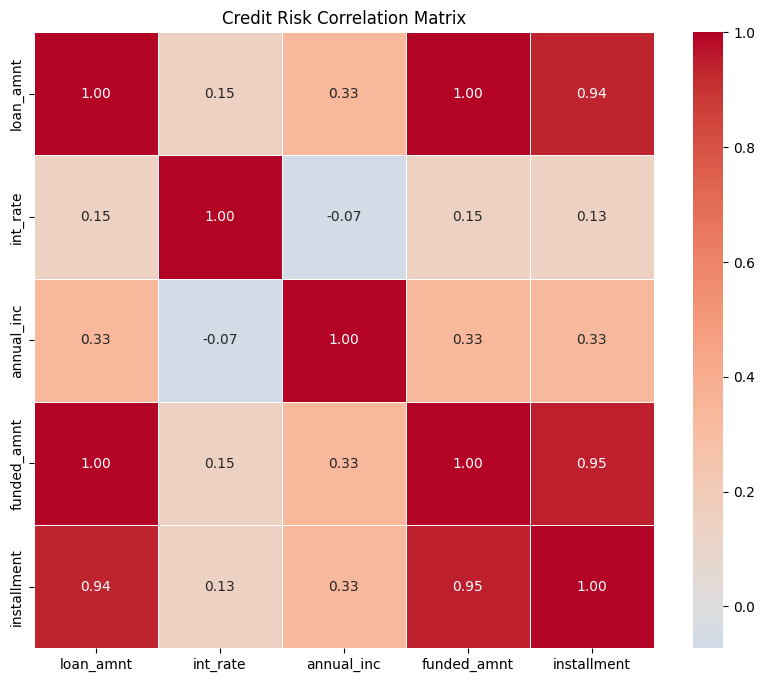

In [65]:
#visualization of heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    center=0,
    fmt=".2f",
    linewidths=0.5
)
plt.title("Credit Risk Correlation Matrix")
plt.show()

Conclusions:


1.   Strong correlation between loan amount and installment - cor. 0.95. Installment payment are higher for bigger loans
2.   Slightly positive relationship between loan amount and annual income.
People with higher annual income tend to have a take bigger loan amounts
3. Strong relationship between loan amount and funded amount.
People with bigger loans have funded more amount to the lenders to reduce the credit risk
4. No correlation between interest rate and annual income.
People with higher annual income don't have higher interest rates



Linear Regression Model - Predict interest rates based on the numerical features of dataset


In [87]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
import pandas as pd

# Define columns and clean
x_col = ['loan_amnt', 'annual_inc', 'funded_amnt', 'installment']
y_col = ['int_rate']

X = df[x_col]
y = df[y_col]

# Impute NaNs
imputer = SimpleImputer(strategy='mean')
X_clean = pd.DataFrame(imputer.fit_transform(X), columns=x_col)
y_clean = pd.DataFrame(imputer.fit_transform(y), columns=y_col)

# Final check
print(X_clean.isnull().sum())
print(y_clean.isnull().sum())

# Split the clean data
x_train, x_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(x_train, y_train)


loan_amnt      0
annual_inc     0
funded_amnt    0
installment    0
dtype: int64
int_rate    0
dtype: int64


LinearRegression()

Predictin on Y-value (interest rate)

In [90]:
y_pred = model.predict(x_test)
print(y_pred)

[[12.5355673 ]
 [13.77168889]
 [13.69177445]
 ...
 [12.45230787]
 [12.339708  ]
 [13.25019691]]


Evaluation of Performance

In [92]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2:.2f}")  # Shows explained variance (0-1)

# Calculate RMSE (correct method)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5  # Square root of MSE
print(f"RMSE: {rmse:.2f}")  # Prediction error in original units

R-squared: 0.04
RMSE: 4.31


Based on this results - > NEEDS IMPROVEMENT _ work in progress


Visualization of Linear Regression Variables

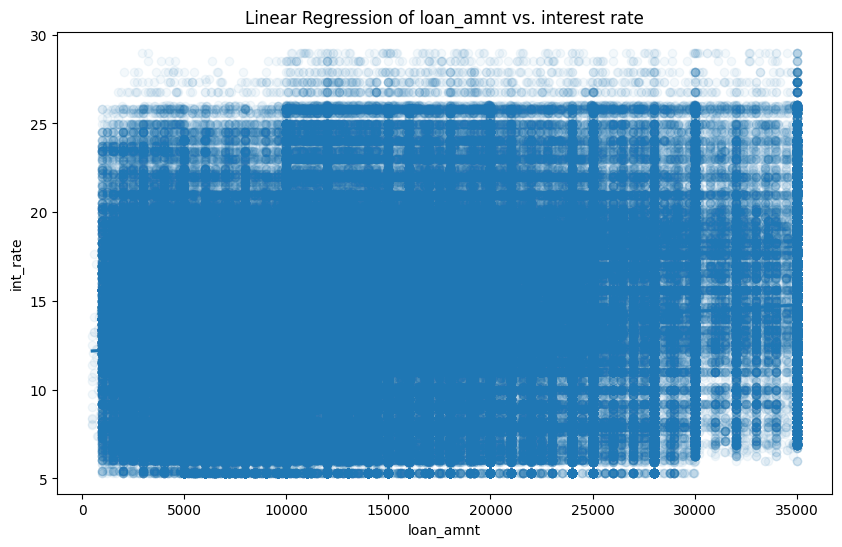

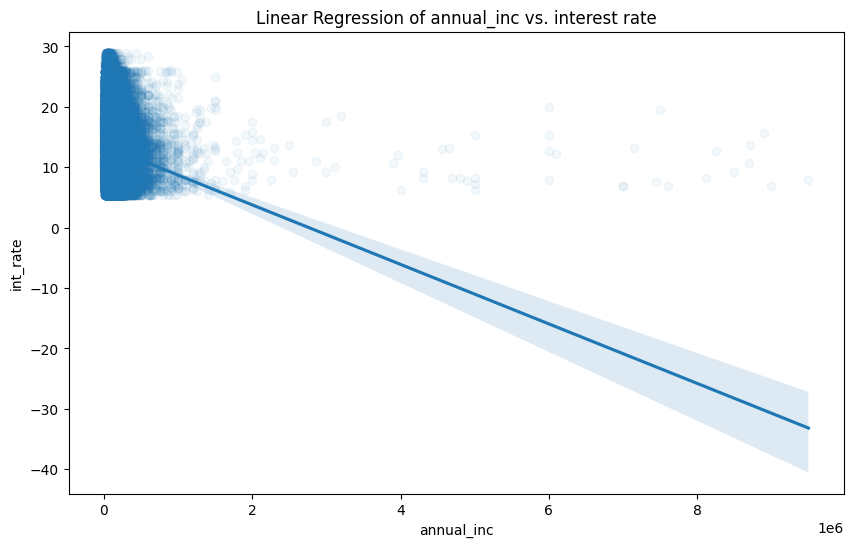

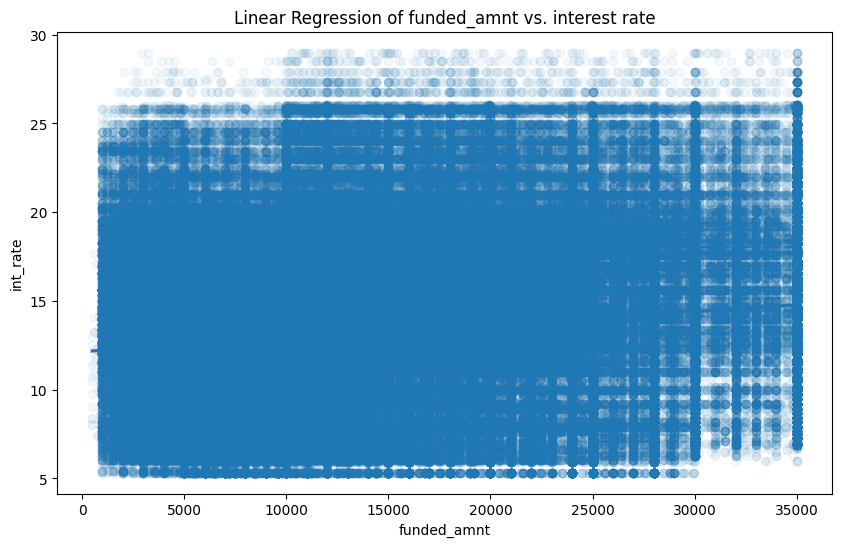

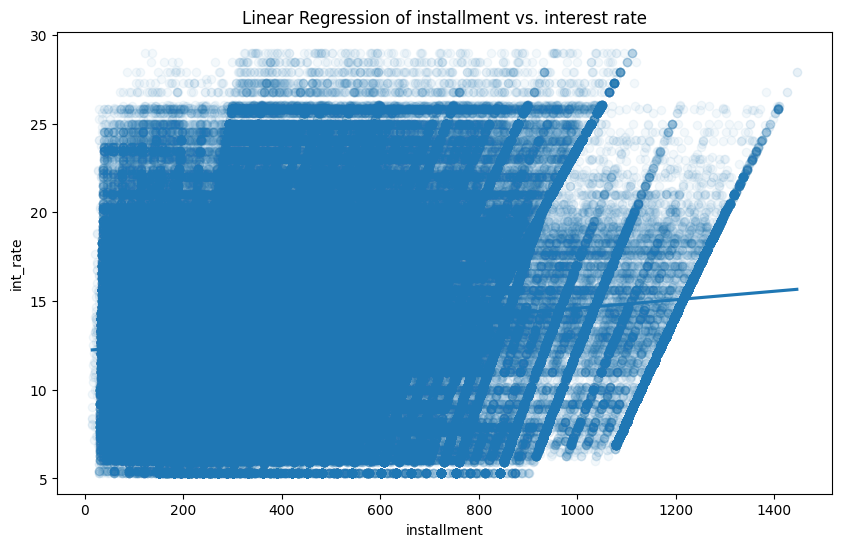

In [96]:
for x_col in x.columns:
  plt.figure(figsize=(10, 6))
  sns.regplot(x=x[x_col], y=y['int_rate'], scatter_kws={'alpha': 0.05})
  plt.title(f'Linear Regression of {x_col} vs. interest rate')
  plt.xlabel(x_col)
  plt.ylabel('int_rate')
  plt.show()

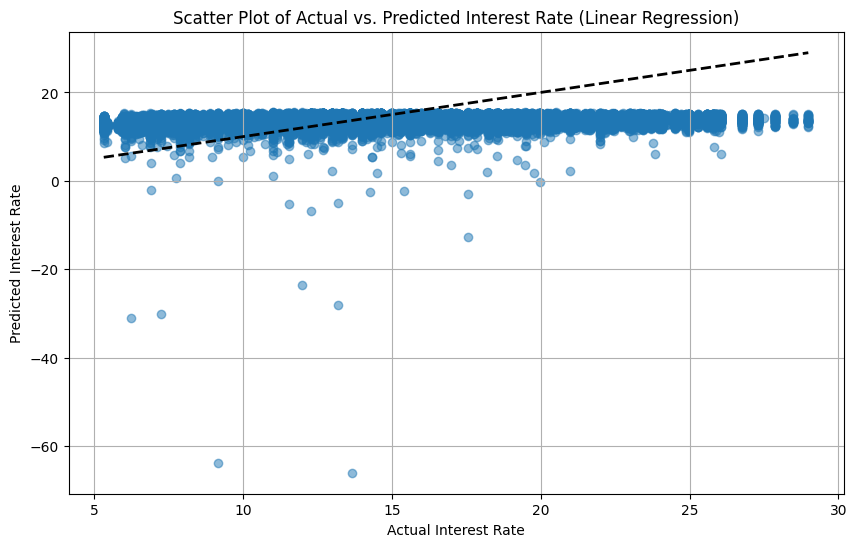

In [97]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Interest Rate')
plt.ylabel('Predicted Interest Rate')
plt.title('Scatter Plot of Actual vs. Predicted Interest Rate (Linear Regression)')
plt.grid(True)
plt.show()